# Tarea 9

### Este codigo encuentra la longitud del grafico de una elipse usando el metodo de integración compuesta del trapecio con una precisión de $10^{-6}$

Importamos las librerias que vamos a ocupar.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.misc import derivative

Nos piden calcular la longitud de grafico de una elipse con ecuación:

## $$4x^2 + 9y^2 = 36$$

La longitud de grafico o perimetro del elipse podemos obtenerla calculando la integrar de linea a partir de la siguiente formula.

# $$ 
l_{elipse} = 4\int_0^{\pi/2}dx \sqrt{a^{2}cos^{2}{\theta}+b^{2}sin^{2}{\theta}} 
$$

Por lo que la función a integrar es:
## $$
f(x) = 4\sqrt{a^{2}cos^{2}{\theta}+b^{2}sin^{2}{\theta}} 
$$

Para hacer uso de la formula necesitamos conocer el valor de los semiejes $a$ y $b$, para ello reordenamos la ecuación para obtener la ecuación canonica de la elipse.

# $$
\frac{x^2}{9} + \frac{y^2}{4} = 1
$$



Con esto obtenemos que los valores de los semiejes $a$ (mayor) y $b$ (menor) son:

### $$a=3$$
### $$ b=2 $$

Definimos la función a integrar.

In [103]:
def funcion(x):
    return 4*np.sqrt(9*np.cos(x)**2+4*np.sin(x)**2)

Sabemos que el error en el metodo del trapecio es:
## $$\frac{h^2 (b-a)}{12}f''(\mu)$$
##### notar que $a$ y $b$ en esta función son los limites de integracion no los semiejes del elipse.  

Para asegurarnos de que tener una precisión mayor o igual a $10^{-6}$ podemos generar una inecuación:
## $$
E_{Integral} \leq\frac{ h^2(b-a)}{12} \underset{a \leq x \leq b}{max}|{f}''(x)|
$$

Por lo que tenemos que obtener la segunda derivada del integrando.

In [110]:
x = sp.Symbol('x') # Definimos la variable sobre la que vamos a derivar
y = 4*sp.sqrt(9*sp.cos(x)**2+4*sp.sin(x)**2) # Definimos la función a derirvar
y.diff(x,x) # Derivamos simbolicamente

-20*(-sin(x)**2 + cos(x)**2 + 5*sin(x)**2*cos(x)**2/(4*sin(x)**2 + 9*cos(x)**2))/sqrt(4*sin(x)**2 + 9*cos(x)**2)

Este resultado se puede reordenar obteniendo:
## $$
-\frac{20\,(9\,\cos^4(x)-4\,\sin^4(x))}{(9\,\cos^2(x)+4\,\sin^2(x))^{3/2}}
$$

Definimos una funcion que aplique lo anterior

In [63]:
def funcion2(x):
    return -(20*(9*(np.cos(x))**4 - 4*(np.sin(x))**4))/(9*(np.cos(x))**2 + 4*(np.sin(x))**2)**(3/2) 

Para ver la forma de esta función y encontrar una cota de forma intuitiva, la graficaremos.

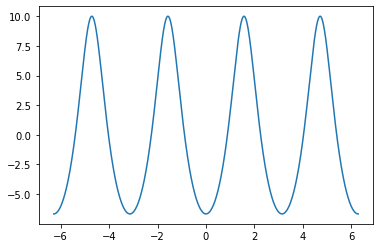

In [111]:
x = np.linspace(-2*np.pi,2*np.pi,1000) # Generamos mil puntos entre -2*pi y 2*pi

plt.plot( x, funcion2(x))

Se logra ver de forma intuitiva que 10 puede ser una buena cota superior con
## $$x= \frac{\pi}{2}$$

Para comprobar que 10 es el valor maximo derivamos nuevamente esta funcion y la evaluamos en $\frac{\pi}{2}$

In [91]:
d = derivative(funcion2,np.pi/2,dx=10**(-8)) # Evaluamos la derivada de la funcion2 en el punto pi/2
r = funcion2(np.pi/2) # Evaluamos la función2 en el punto  pi/2
print(r , d)

10.0 0.0


Con estop demostramos que el mayor valor que pueden alcanzar la segunda derivada de nuestro integrando es 10, por lo que el termino de error quedaria de la siguiente forma:
## $$\frac{5\,h^2 (b-a)}{6}$$


Sabiendo que $h = \frac{(b - a)}{n}$ nos queda: 
## $$\frac{5\,(b-a)^3}{6\,n^2}$$
##### Notar que n es el numero de trapecios generados para la aproximación
Teniendo $a = 0$ y $b = \frac{\pi}{2}$ y sabiendo que debe ser menor a la precision solicitada podemos generar la siguiente inecuación para encontrar el valor de n:
## $$\frac{5\,(\frac{\pi}{2})^3}{6\,n^2} \leq 10^{-6}$$
Despejando n:
## $$ n \geq 250 \sqrt{\frac{5}{3} }\pi^{3/2}$$

Resolvemos el termino de la derecha

In [106]:
250*np.sqrt(5/3)*np.pi**(3/2)

1797.170133162476

Por lo que para obtener un error menor a $10^{-6}$:
## $$n \geq 1797$$

In [112]:
n=1798 # Elegimos un valor para n que nos de la precisión requerida

Ya sabiendo el valor necesario de n para obtener con la precisión requerida tenemos todo para aplicar el metodo compuesto del trapecio, por lo que ahora definimos una funcion que aplique el metodo del trapecio:

In [104]:
def trapecio(f, a, b, n):
    fx= [] # Generamos una lista para guardar los puntos de la función
    h = (b - a)/n # Definimos h
    xp = np.linspace(a+h, b-h, n-1, endpoint=True) # Generamos los puntos donde se evalua la función para generar los trapecios
    k= len(xp) # Tomamos el tamaño de la lista de puntos para el ciclo while
    i=0
    # Generamos un cilco while para evaluar la función en todos los puntos
    while i < k: # Repetimos el proceso de 0 hasta k-1
        fx.append(f(i)) # Evaluamos la funcion en todos los punto numero i
        i=i+1
    return (h/2)*(f(a) + 2*sum(fx) + f(b)) # Aplicamos finalmente el metodo compuesto del trapecio.

In [113]:
L = trapecio(funcion, 0, np.pi/2, n)
print('La longitud de grafico del elipse es aproximadamente', str(L), 'con una precisión de 10^{-6}' )

La longitud de grafico del elipse es aproximadamente 15.865361219317114 con una precisión de 10^{-6}
